In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Last inn NVDA.csv
df = pd.read_csv("NVDA.csv")

**Eksempel 1**

Verdigraf for verdi av NVIDIA aksjer når markedet stengte for dagen, *Kolonnen "Close"*

Dekker verdien fra 22.01.1999 frem til 23.11.2022, **nyere data er ikke inkludert**

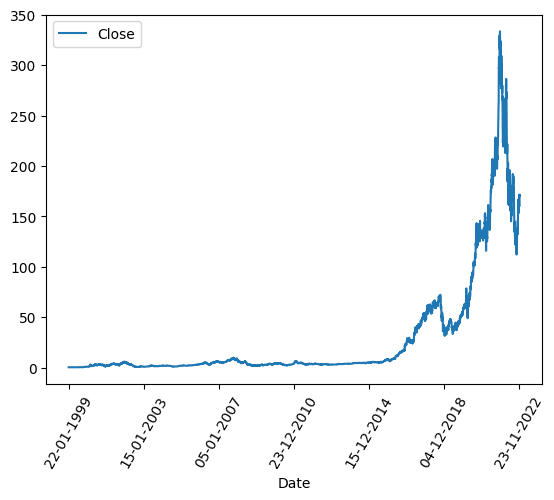

In [2]:
df[["Date","Close"]].plot(x="Date", y="Close")
plt.xticks(rotation = 60)
plt.show()

**Change**

Lagde en ny kolonne som viser den gjennomsnittlige økningen/minkingen av verdien mellom når markedet åpnet og stengte på én dag

*Dette er viktig senere for bestemmelsen om en aksje burde holdes eller selges på en viss dag*

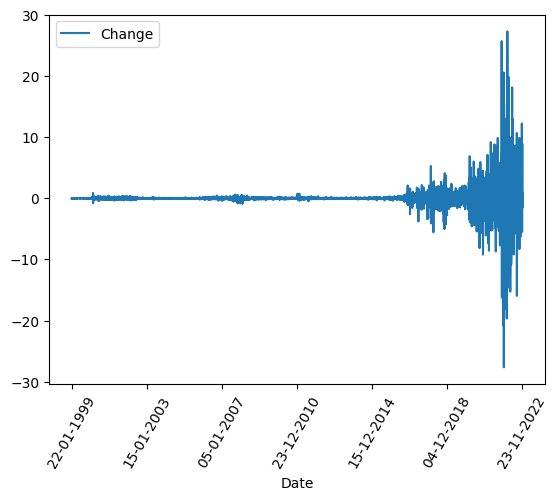

In [3]:
df["Change"] = df["Close"] - df["Open"]
df[["Date","Change"]].plot(x="Date", y="Change")
plt.xticks(rotation=60)
plt.show()

**Zoom funksjon**

Zoomer inn på de siste *n* dagene i datasettet, med fokus på én enkelt verdi

*print_last_n_days(int,str)*

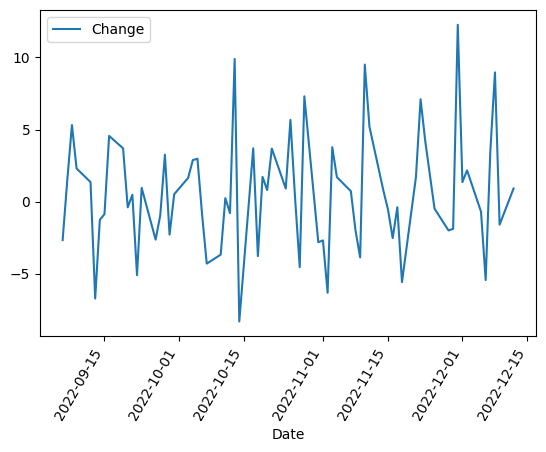

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

#Generer en egen kolonne som inneholder antall dager til siste dag i datasettet for å gjøre det enklere å håndtere senere
df["Time_until_end"] = pd.Timestamp.now() - df["Date"] 

#2 parametre: days - antall dager før siste tilgjengelige dag i datasette, focus - hvilken kolonne som skal grafes på y aksen
def print_last_n_days(days, focus):
    #Lag og begrens en ny DataFrame med riktig kolonner og rader
    recent = df[["Date",focus,"Time_until_end"]]
    recent = recent[ recent["Time_until_end"] < pd.Timedelta(days=(pd.Timestamp.now() - df["Date"].iloc[-1]).days + days)]

    recent[["Date", focus]].plot(x="Date",y=focus)
    plt.xticks(rotation=60)
    plt.show()

print_last_n_days(100,"Change")

**ChangePercentage**

Lager en ny kolonne som også viser endringen i verdi, men her i form av prosent

Gjør det mye enklere å beregne verdiendringer på en investering

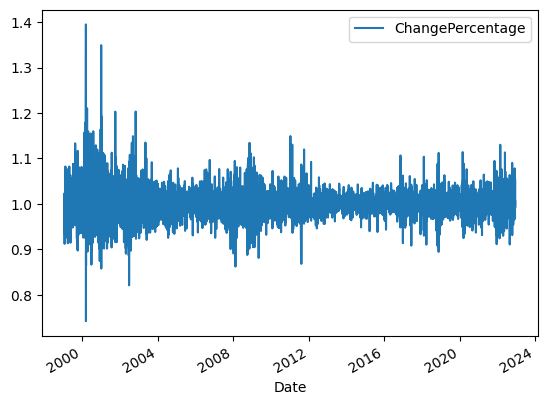

In [5]:
#Regner ut verdiendringen som en prosent og lager en ny kolonne
df["ChangePercentage"] = (df["Close"] - df["Open"]) / df["Open"] + 1

df[["ChangePercentage", "Date"]].plot(x="Date",y="ChangePercentage")
plt.show()

---

# Optimal Investering


C:\Users\hansd\AppData\Local\Temp\ipykernel_32408\144712741.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.35302156236885' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,"Cash"] = cash


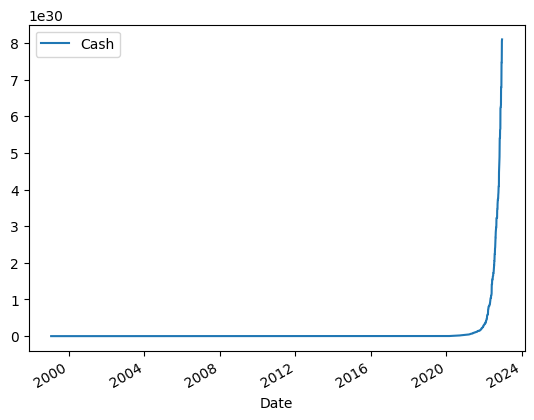

In [14]:
#Startmengden som blir investert
cash = 100

#Ny kolonne som inneholder verdien av den opprinnelige investeringen
df["Cash"] = 0

#Går gjennom hele datasettet og regner ut maksimale tjeningen mulig
isHolding = False
for i in range(len(df)):
    if(df["Change"].iloc[i] > 0):
        cash = cash * df["ChangePercentage"].iloc[i]
    df.loc[i,"Cash"] = cash

df[["Cash","Date"]].plot(x="Date",y="Cash")
plt.show()

**Optimal investering**

Programmet bruker de nye kolonnene *Change* og *"ChangePercentage"* for å regne ut verdiøkningen til en investering om kjøpt/solgt perfekt for hver dag

Her er det antatt at en aksje alltid vil bli kjøpt/solgt i starten/slutten av en dag, og programmet ignorerer alle verdisvingningen innad én dag

Den nye kolonnen *"Cash"* inneholder verdien av den opprinnelige investeringen ved slutten av hver dag

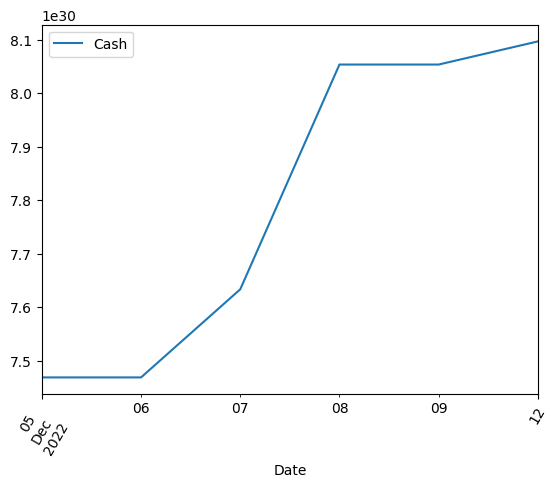

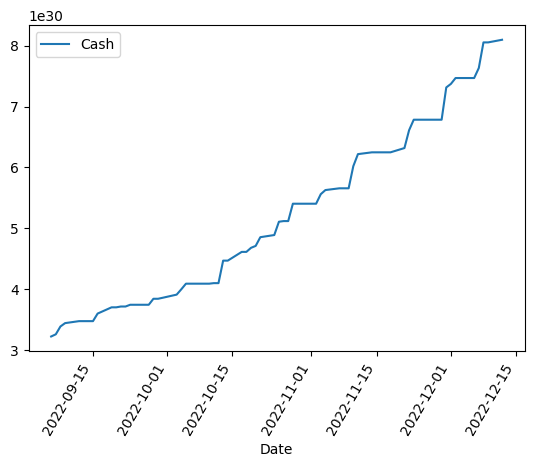

6012    8.097110e+30
Name: Cash, dtype: float64


In [15]:
print_last_n_days(10,"Cash")
print_last_n_days(100,"Cash")
print(df["Cash"].tail(1))

**Resultat**

En investering vokser ekstremt brått eksponensielt mot slutten av datasettet *(ca siste 2 årene)*

Til slutt ender verdien på den opprinnelige investeringen *(på 100kr)* på **>8,000,000,000,000,000,000,000,000,000,000kr**

---

**Kilder**

https://www.markdownguide.org/cheat-sheet/

https://pandas.pydata.org/docs/user_guide/index.html